In [1]:
##red wine

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import missingno as msno
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report


In [33]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [34]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


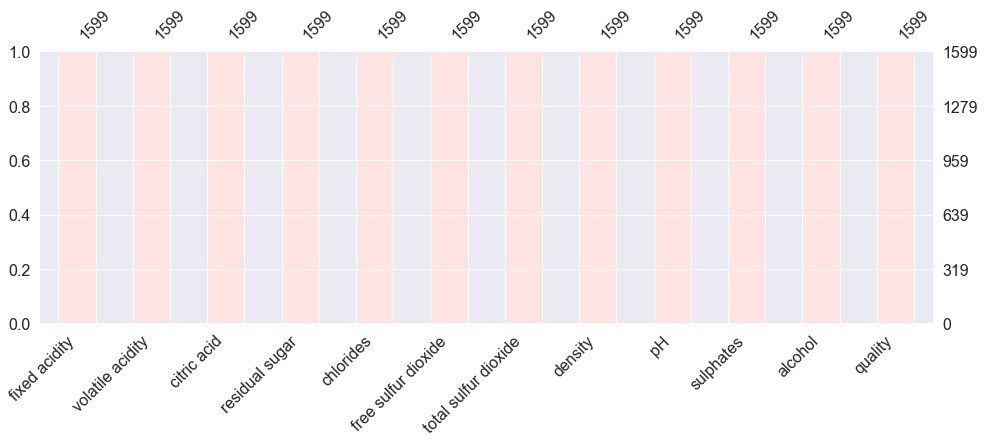

In [36]:
msno.bar(df, figsize = (16,5),color = "#FFE4E1")
plt.show()

In [37]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [38]:
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [39]:
df.drop_duplicates(keep='first', inplace=True)

In [40]:
df.duplicated().value_counts()

False    1359
dtype: int64

In [41]:
columns=df.columns


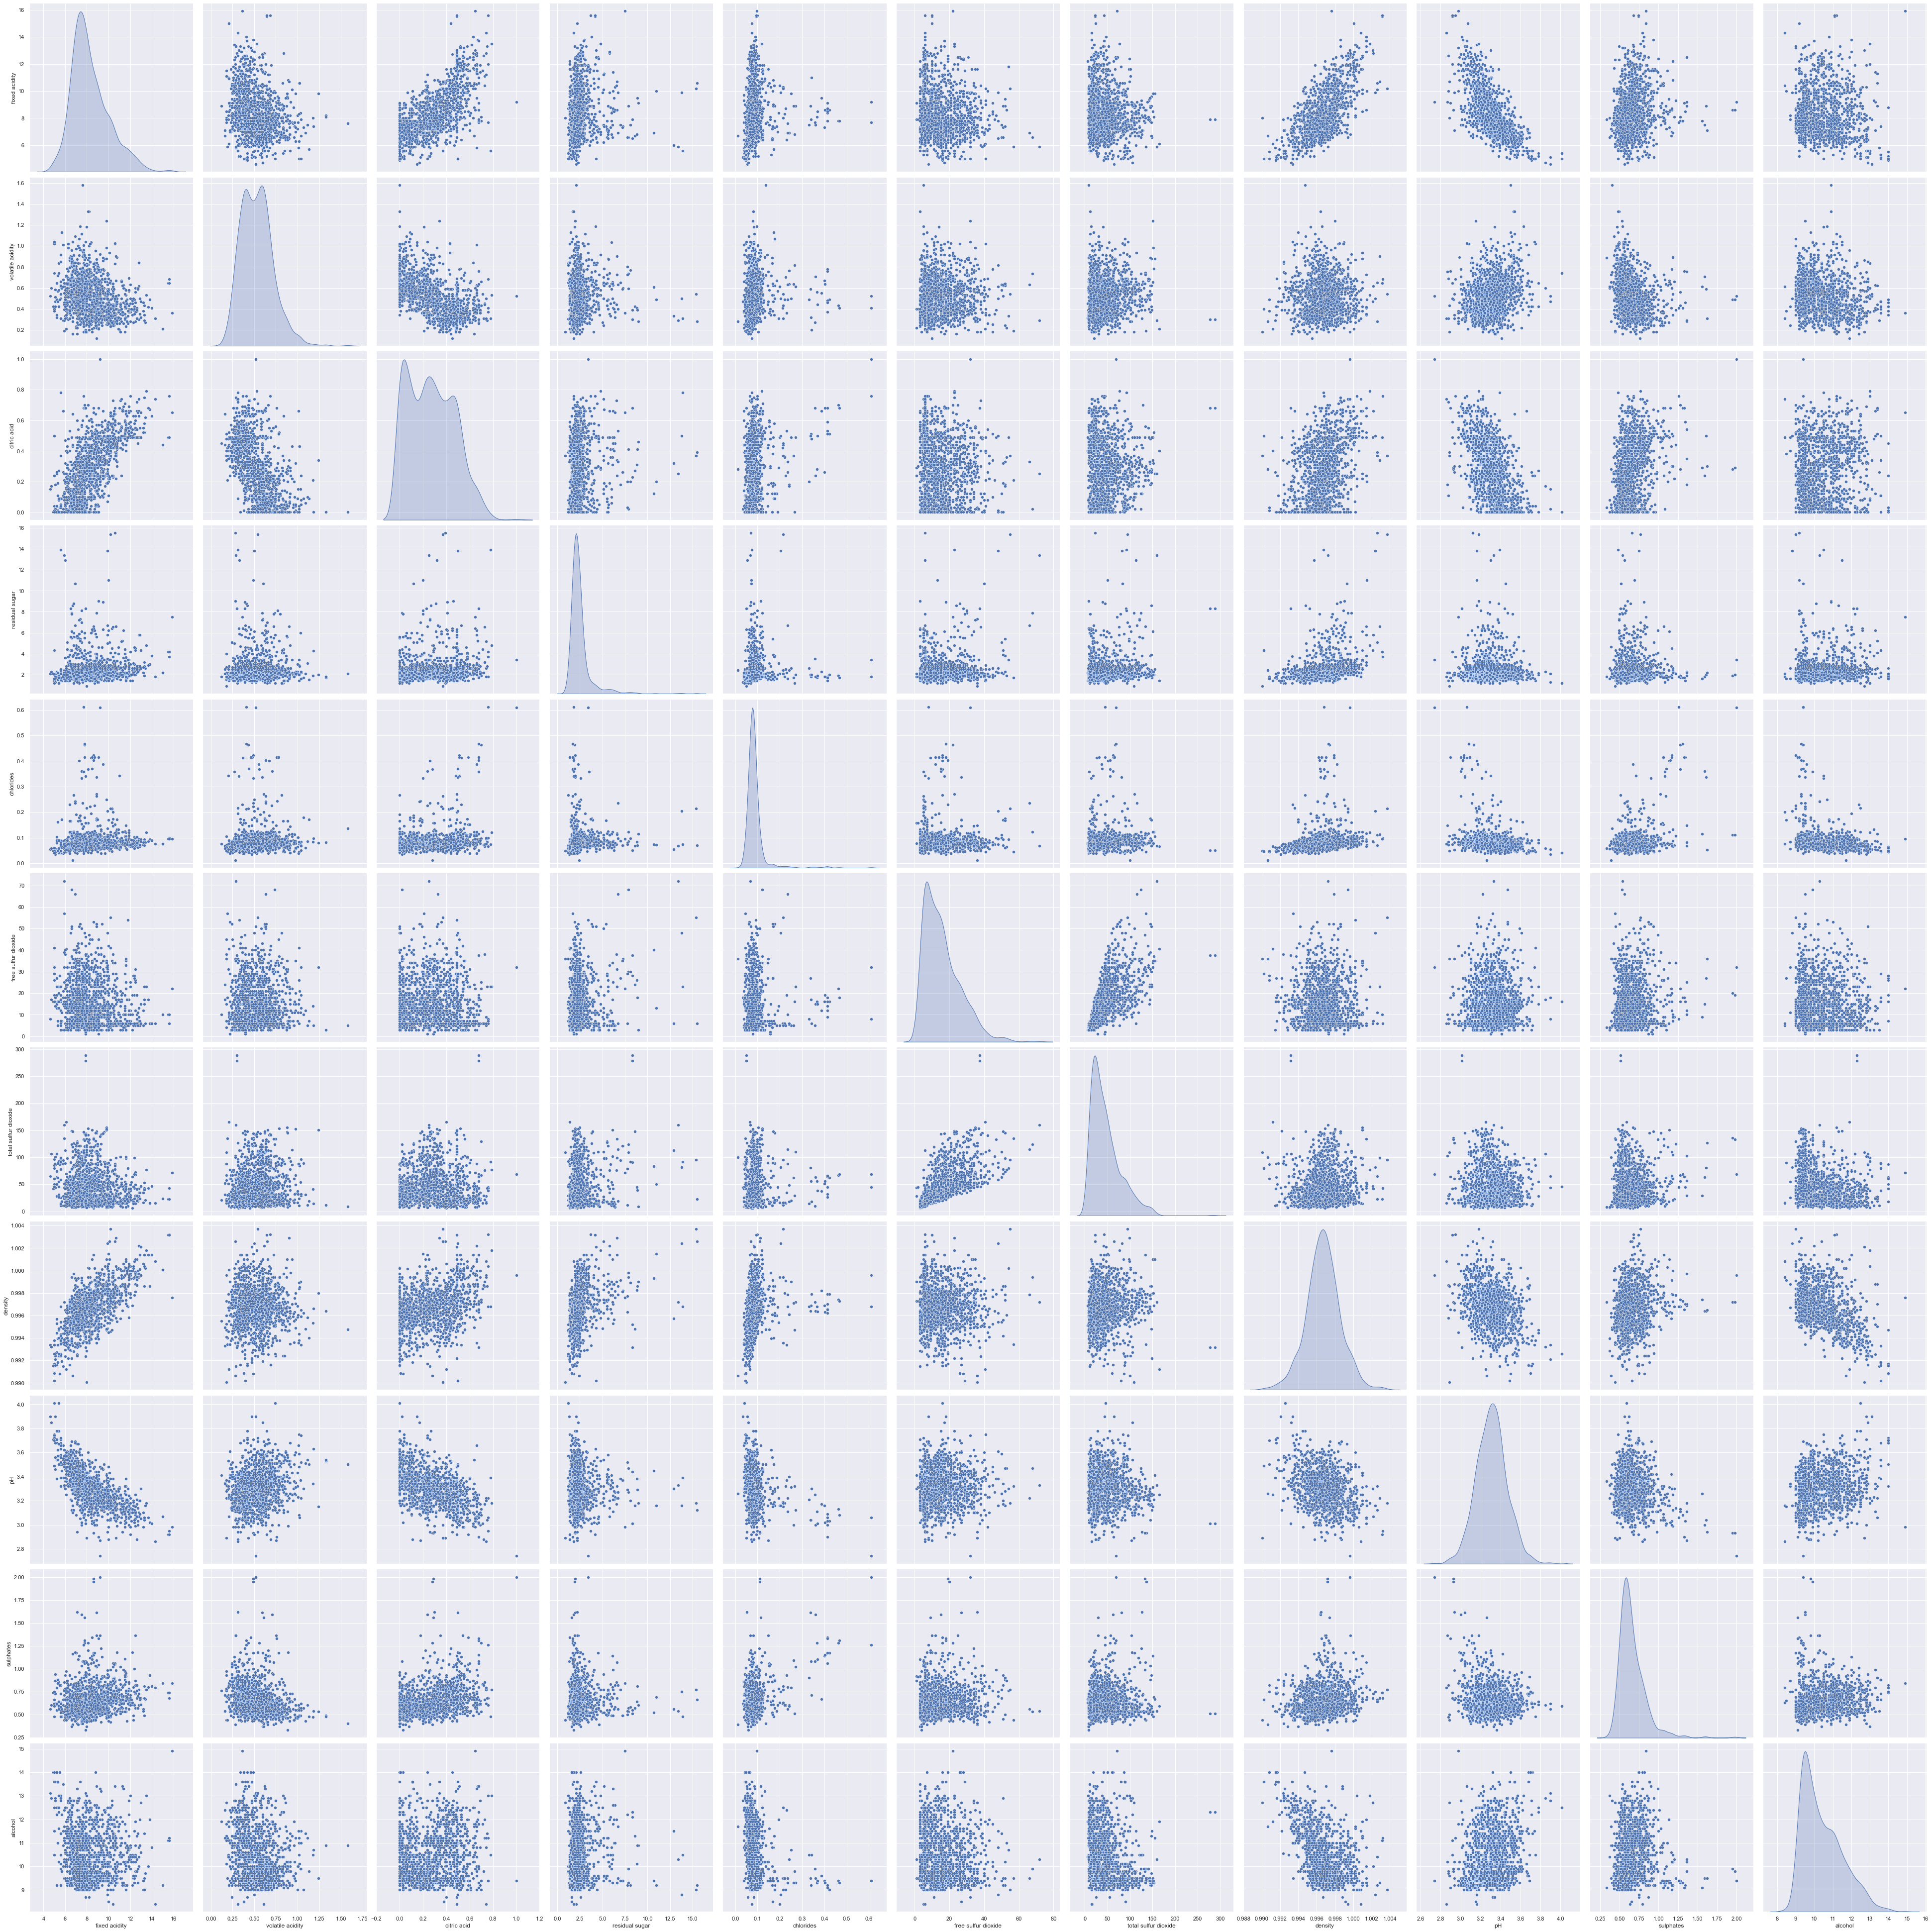

In [30]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [42]:
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

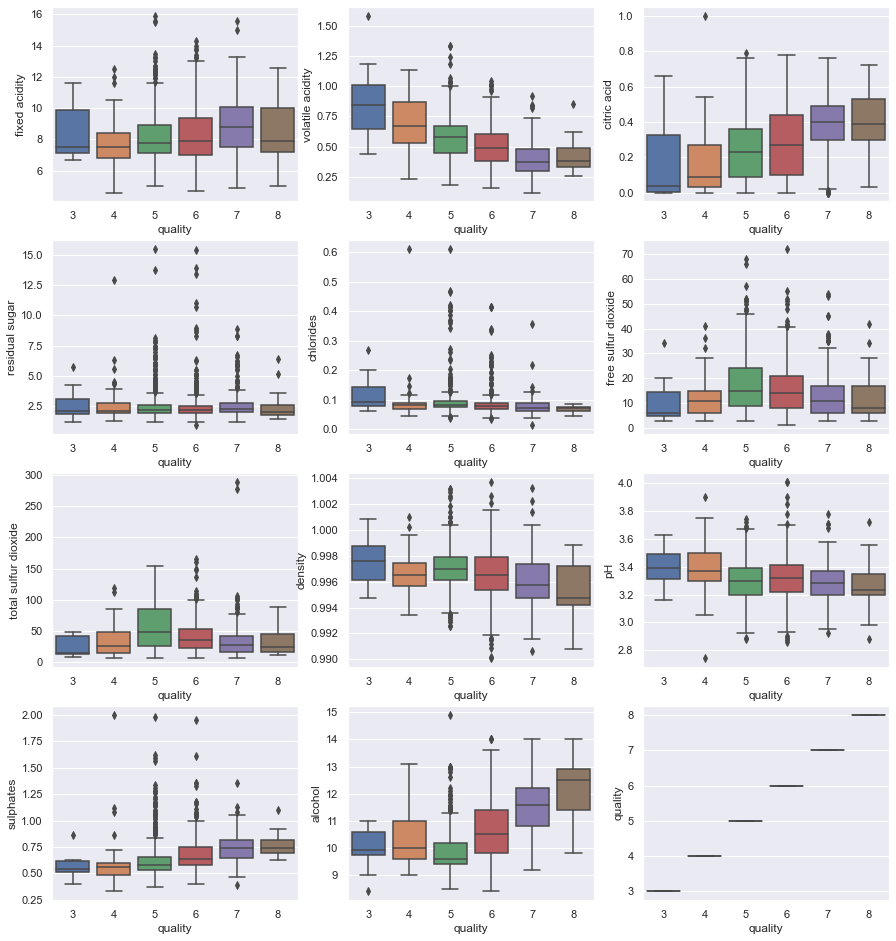

In [44]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['quality'])
    i+=1

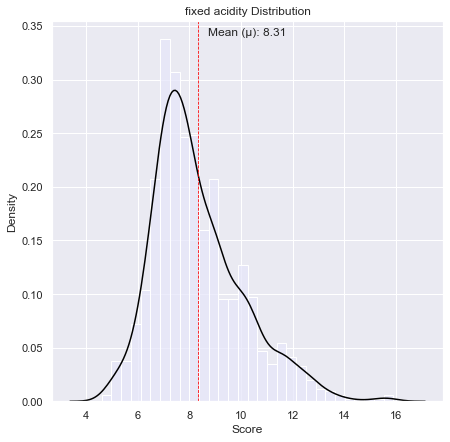

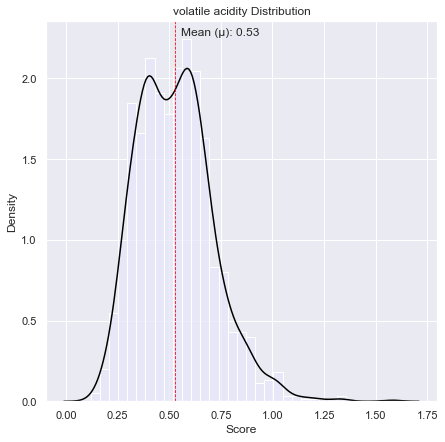

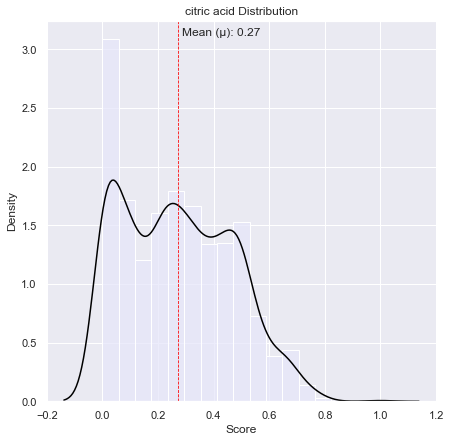

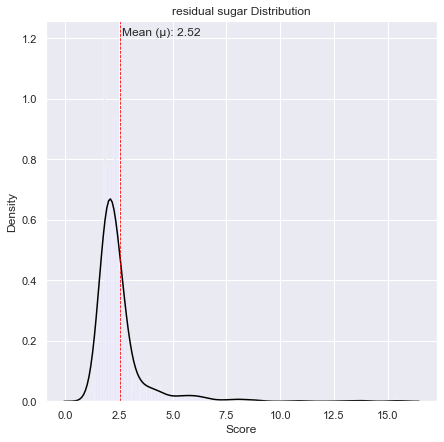

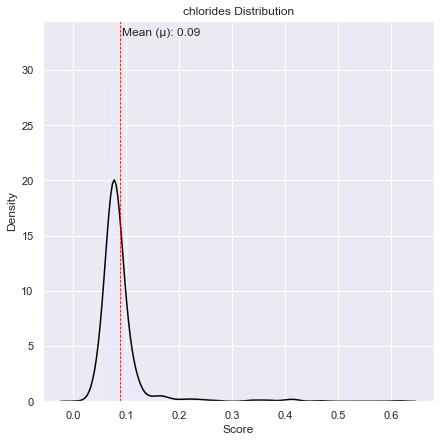

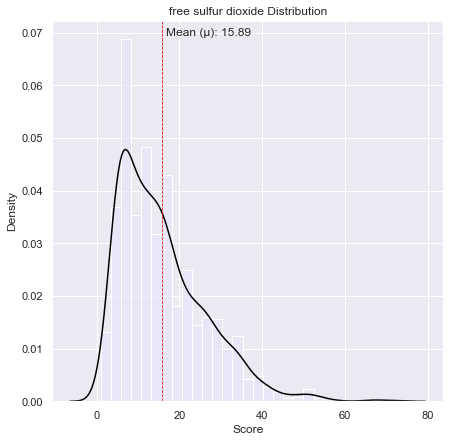

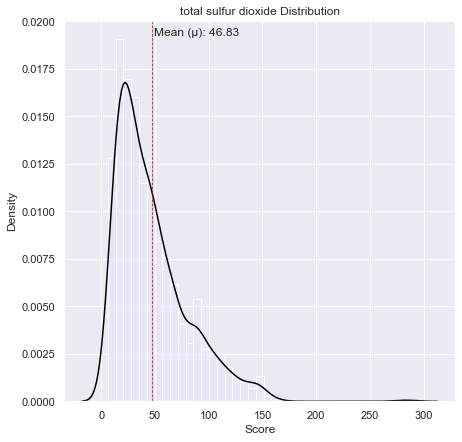

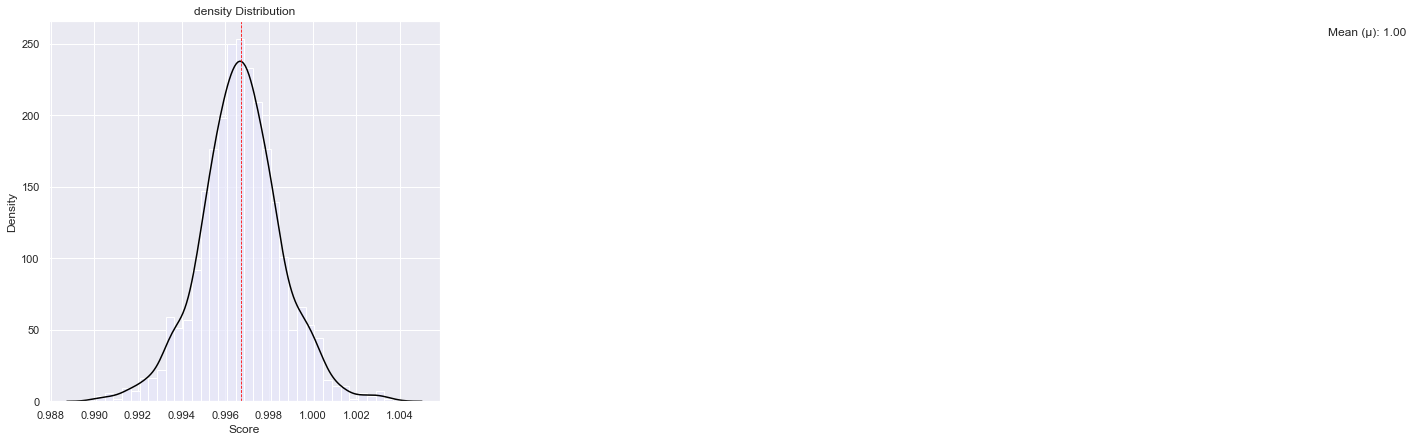

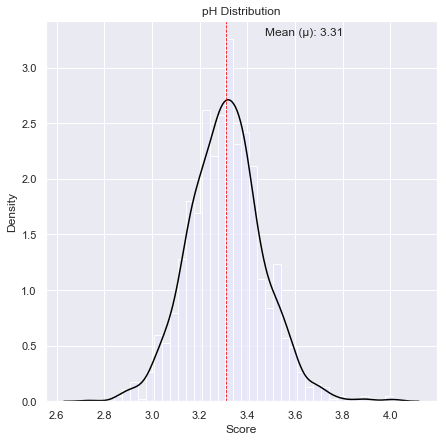

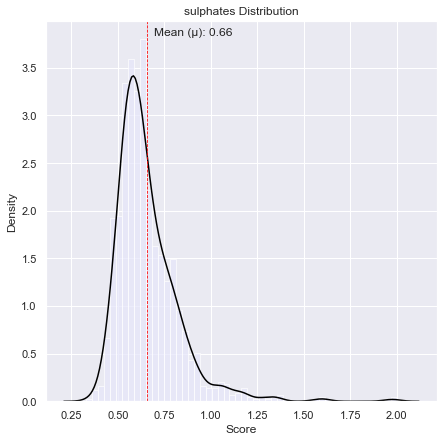

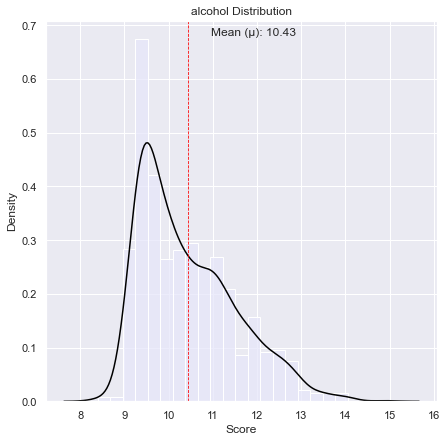

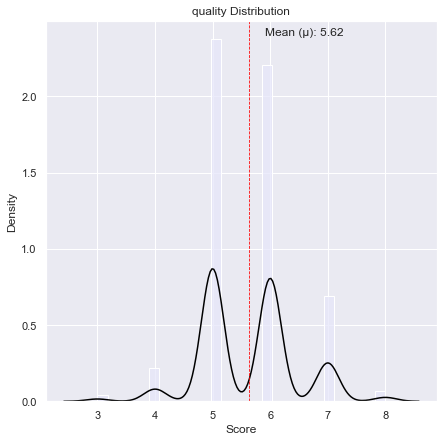

In [45]:
for column_name in df.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

In [46]:
correlation = df.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'free sulfur dioxide', 'pH', 'chlorides',
       'total sulfur dioxide'],
      dtype='object')


<AxesSubplot:>

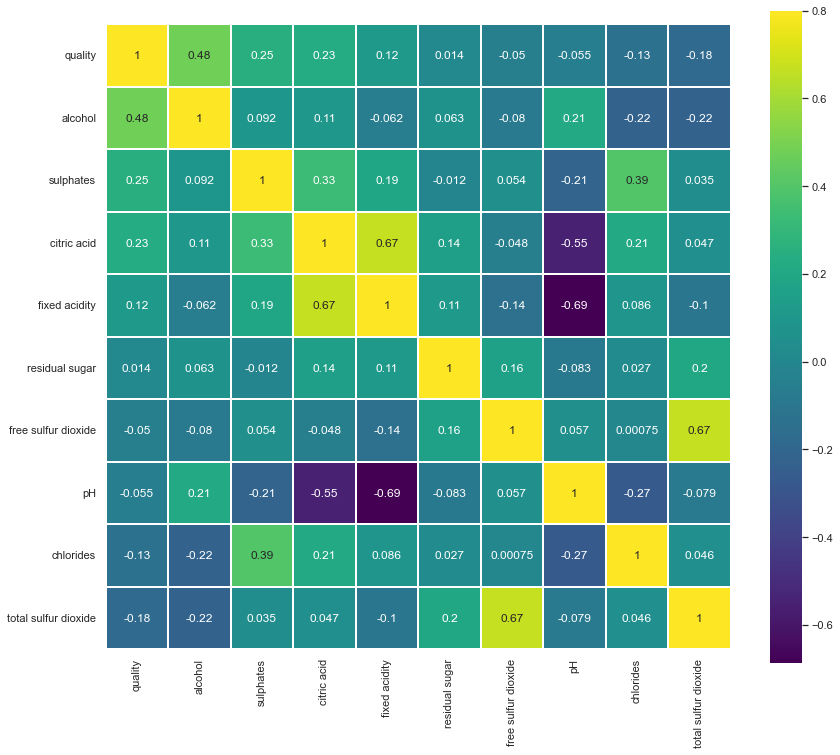

In [47]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [48]:
y=df['quality']
df=df.drop(['quality'],axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [55]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(951, 11) (408, 11) (951,) (408,)


In [58]:
# Transformar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [59]:
X_train_std

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.90236307,  0.35241996],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.86300883, -0.93981891],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.25543745, -0.2013967 ],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
        -0.03916861, -0.75521335],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.62762591, -0.01679115],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.62762591,  0.90623661]])

In [60]:
X_test_std

array([[-0.35421567,  0.51724945, -1.191325  , ...,  0.20919976,
        -0.74531737, -0.84751613],
       [-0.06291586,  0.60206053, -0.88415372, ..., -0.12550578,
         0.54928869,  0.44472273],
       [ 0.05360407, -0.89626845,  0.80528833, ..., -0.92879908,
         0.90236307,  0.72163106],
       ...,
       [ 0.34490388,  0.3476273 ,  0.60050747, ...,  0.41002309,
        -0.45108872, -0.10909392],
       [ 0.9275035 , -1.17897203,  1.4708261 , ..., -1.0626813 ,
         0.43159723,  0.90623661],
       [ 1.04402343, -1.23551274,  0.39572662, ..., -0.46021132,
         1.02005453,  0.72163106]])

In [63]:
model_lin = LinearRegression()

In [64]:
# Treinar o modelo
model_lin.fit(X_train_std, y_train)

LinearRegression()

In [65]:
# Gerando as predições
y_pred = model_lin.predict(X_test_std)

In [66]:
y_pred

array([5.20601276, 5.80794046, 6.37839552, 5.15367312, 5.16750226,
       6.77514884, 5.73470854, 4.79469636, 5.83275894, 5.70543704,
       6.25294395, 5.9092998 , 6.03344825, 5.54223606, 6.29250125,
       5.26577971, 5.98615142, 5.31451491, 5.21354188, 5.88397933,
       5.22357396, 6.13169005, 5.29774422, 4.76010538, 5.75638592,
       4.78310043, 5.69428478, 5.37477087, 5.23690585, 5.34152794,
       6.05312294, 6.31583617, 5.77220141, 4.65304119, 5.61909201,
       6.25444472, 4.8521017 , 5.87743732, 5.26477632, 6.21207868,
       5.20286561, 5.76046454, 6.01550139, 4.62407791, 5.43790661,
       5.46435119, 5.07638529, 4.38727053, 5.12270188, 5.82943513,
       5.52957767, 6.1260587 , 5.91491236, 5.62848967, 6.28921261,
       5.15275593, 5.22886999, 5.20480431, 5.01558688, 6.02472051,
       4.89272727, 6.12395561, 5.14575604, 5.90720404, 5.78676722,
       5.94073106, 5.12583837, 5.47610782, 6.09571178, 6.12410372,
       5.58546665, 5.97538564, 5.97748928, 6.08530108, 5.82073

In [67]:
# Carregando as metricas
from sklearn.metrics import r2_score

In [68]:
# Calculando o R2
R2 = r2_score(y_test, y_pred)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.381537112941836


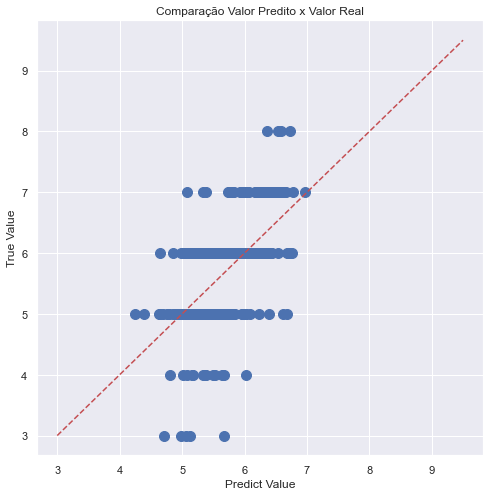

In [69]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_std, y_train)
y_pred_ridge = ridge.predict(X_test_std)

In [71]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_ridge)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.38176333175796795


In [74]:
from sklearn.linear_model import Lasso
# Instancia o modelo
lasso = Lasso()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [75]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_lasso)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -3.0023969703751874e-05


In [77]:
lasso.coef_

array([ 0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.])

In [80]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()


In [81]:
coef_table.insert(len(coef_table.columns),"Coefs",model_lin.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

0     Coefs
10               alcohol  0.327805
9              sulphates  0.152365
5    free sulfur dioxide  0.068262
7                density  0.038427
2            citric acid  0.003862
3         residual sugar -0.023914
0          fixed acidity -0.054221
4              chlorides -0.097252
8                     pH -0.123122
6   total sulfur dioxide -0.124849
1       volatile acidity -0.176024

In [82]:
from sklearn.linear_model import ElasticNet

# Instancia o modelo
EN = ElasticNet()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
EN.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_EN = EN.predict(X_test_std)

In [83]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_EN)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -3.0023969703751874e-05


In [ ]:
## Regressão Logística red wines

In [92]:
## transformação para a obtenção da target

y_train_class = np.where(y_train >= 6, 1,0)
y_test_class = np.where(y_test >= 6, 1,0)

In [93]:
#verificando se a classe é balanceada, a fim de se verificar 
# o uso correto da acurácia para avaliaçao do modelo.
pd.DataFrame(y_train_class).value_counts(normalize=True)


1    0.526814
0    0.473186
dtype: float64

In [89]:
# import da Regressão Logistica
from sklearn.linear_model import LogisticRegression

In [90]:
# Instancia o classificador
model = LogisticRegression(max_iter = 1000)

In [94]:
# Treinar o modelo
model.fit(X_train_std, y_train_class)

LogisticRegression(max_iter=1000)

In [96]:
y_pred_class = model.predict(X_test_std)
y_pred_class

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix


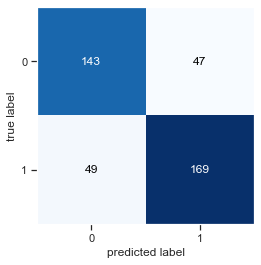

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       190
           1       0.78      0.78      0.78       218

    accuracy                           0.76       408
   macro avg       0.76      0.76      0.76       408
weighted avg       0.76      0.76      0.76       408



In [99]:
cm = confusion_matrix(y_test_class, y_pred_class)
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_test_class, y_pred_class))

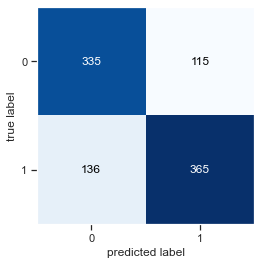

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       450
           1       0.76      0.73      0.74       501

    accuracy                           0.74       951
   macro avg       0.74      0.74      0.74       951
weighted avg       0.74      0.74      0.74       951



In [100]:
cm = confusion_matrix(y_train_class, model.predict(X_train_std))
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_train_class, model.predict(X_train_std)))